# Famine Early Warning System (FEWS)

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("FEWS.csv").convert_dtypes()

### Rows and column

In [4]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 22


In [5]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

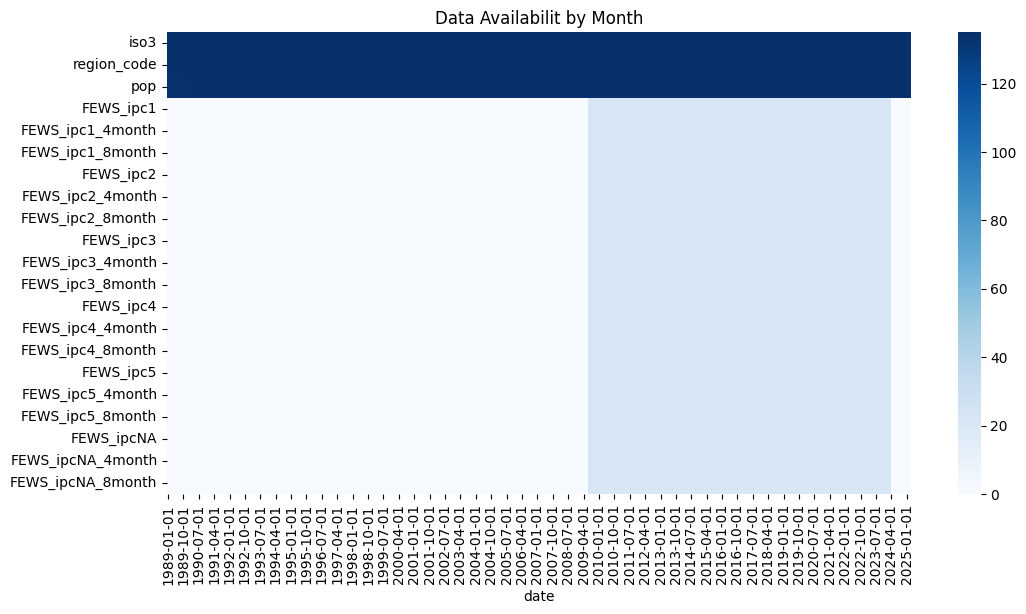

In [6]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

### Sample data and features

In [7]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,BLZ,TUV,ZMB,TUN,ZWE
region_code,LAC,EAP,SSA,MNA,SSA
pop,411106.0,9816.0,20723965.0,12200431.0,16340822.0
FEWS_ipc1,<NA>,<NA>,<NA>,<NA>,<NA>
FEWS_ipc1_4month,<NA>,<NA>,<NA>,<NA>,<NA>
FEWS_ipc1_8month,<NA>,<NA>,<NA>,<NA>,<NA>
FEWS_ipc2,<NA>,<NA>,<NA>,<NA>,<NA>
FEWS_ipc2_4month,<NA>,<NA>,<NA>,<NA>,<NA>
FEWS_ipc2_8month,<NA>,<NA>,<NA>,<NA>,<NA>
FEWS_ipc3,<NA>,<NA>,<NA>,<NA>,<NA>


### Data structure, data types and non null counts

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58725 entries, 1989-01-01 to 2025-03-01
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso3               58725 non-null  string 
 1   region_code        58725 non-null  string 
 2   pop                58713 non-null  Float64
 3   FEWS_ipc1          3894 non-null   Float64
 4   FEWS_ipc1_4month   3894 non-null   Float64
 5   FEWS_ipc1_8month   3894 non-null   Float64
 6   FEWS_ipc2          3894 non-null   Float64
 7   FEWS_ipc2_4month   3894 non-null   Float64
 8   FEWS_ipc2_8month   3894 non-null   Float64
 9   FEWS_ipc3          3894 non-null   Float64
 10  FEWS_ipc3_4month   3894 non-null   Float64
 11  FEWS_ipc3_8month   3894 non-null   Float64
 12  FEWS_ipc4          3894 non-null   Float64
 13  FEWS_ipc4_4month   3894 non-null   Float64
 14  FEWS_ipc4_8month   3894 non-null   Float64
 15  FEWS_ipc5          3894 non-null   Float64
 16  FEWS_ipc5_4mo

### Descrptive statistics of categorical columns

In [9]:
df.describe(include='string').T

,count,unique,top,freq
iso3,58725,135,AFG,435
region_code,58725,6,SSA,20445


### Descrptive statistics of numerical columns

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,58713.0,41259533.486332,153319719.021372,8662.0,2108617.0,8303151.0,25698326.0,1438069596.0
FEWS_ipc1,3894.0,0.476898,0.379056,0.0,0.0,0.542215,0.837305,1.0
FEWS_ipc1_4month,3894.0,0.414187,0.388157,0.0,0.0,0.424845,0.793066,1.0
FEWS_ipc1_8month,3894.0,0.421,0.394372,0.0,0.0,0.437081,0.817147,1.0
FEWS_ipc2,3894.0,0.214035,0.232,0.0,0.001925,0.140553,0.346404,0.983915
FEWS_ipc2_4month,3894.0,0.183837,0.221696,0.0,0.0,0.104409,0.294955,1.0
FEWS_ipc2_8month,3894.0,0.172628,0.217418,0.0,0.0,0.076593,0.283159,0.988865
FEWS_ipc3,3894.0,0.107381,0.194661,0.0,0.0,0.015125,0.120774,1.0
FEWS_ipc3_4month,3894.0,0.105769,0.195421,0.0,0.0,0.008468,0.124651,1.0
FEWS_ipc3_8month,3894.0,0.102805,0.1903,0.0,0.0,0.006506,0.117298,1.0


### Details of missing values in the features

In [11]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
FEWS_ipc1_4month,54831,93.37
FEWS_ipc1,54831,93.37
FEWS_ipc2_4month,54831,93.37
FEWS_ipc2,54831,93.37
FEWS_ipc1_8month,54831,93.37
FEWS_ipc4_4month,54831,93.37
FEWS_ipc4_8month,54831,93.37
FEWS_ipc5,54831,93.37
FEWS_ipc2_8month,54831,93.37
FEWS_ipc3,54831,93.37


In [12]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [13]:
df.columns

Index(['pop', 'region_code', 'iso3'], dtype='object')

### Since mostly missing values are there and all columns have to be dropped no further pca is performed